<a href="https://colab.research.google.com/github/Rusira54321/Fuel-Efficiency-Prediction/blob/main/HousepricePredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']


In [ ]:
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')

/tmp/ipython-input-131-4037276536.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.shape

(398, 9)

In [ ]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [ ]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,float64
acceleration,float64
model_year,int64
origin,int64
car_name,object


In [ ]:
rows_with_null = df[df.isnull().any(axis=1)]
print(rows_with_null)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN  2046.0          19.0   
126  21.0          6         200.0         NaN  2875.0          17.0   
330  40.9          4          85.0         NaN  1835.0          17.3   
336  23.6          4         140.0         NaN  2905.0          14.3   
354  34.5          4         100.0         NaN  2320.0          15.8   
374  23.0          4         151.0         NaN  3035.0          20.5   

     model_year  origin              car_name  
32           71       1            ford pinto  
126          74       1         ford maverick  
330          80       2  renault lecar deluxe  
336          80       1    ford mustang cobra  
354          81       2           renault 18i  
374          82       1        amc concord dl  


In [ ]:
horse_power_mean = df["horsepower"].mean()
print(horse_power_mean)

104.46938775510205


In [ ]:
df['horsepower'] = df['horsepower'].fillna(horse_power_mean)

the weights are measure by the pounds so i convert pounds in to the kgs and add those data into a new column

In [ ]:
df['weight_kg'] = df['weight'] * 0.453592

In [ ]:
df.drop("weight", axis=1, inplace=True)

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,acceleration,model_year,origin,weight_kg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,15.568090,76.010050,1.572864,1347.360846
std,7.815984,1.701004,104.269838,38.199187,2.757689,3.697627,0.802055,384.120654
min,9.000000,3.000000,68.000000,46.000000,8.000000,70.000000,1.000000,731.643896
25%,17.500000,4.000000,104.250000,76.000000,13.825000,73.000000,1.000000,1008.675210
50%,23.000000,4.000000,148.500000,95.000000,15.500000,76.000000,1.000000,1271.645172
75%,29.000000,8.000000,262.000000,125.000000,17.175000,79.000000,2.000000,1636.559936
max,46.600000,8.000000,455.000000,230.000000,24.800000,82.000000,3.000000,2331.462880


In [ ]:
df["model_year"] = df["model_year"] + 1900

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,acceleration,model_year,origin,car_name,weight_kg
0,18.0,8,307.0,130.0,12.0,1970,1,chevrolet chevelle malibu,1589.386368
1,15.0,8,350.0,165.0,11.5,1970,1,buick skylark 320,1675.115256
2,18.0,8,318.0,150.0,11.0,1970,1,plymouth satellite,1558.542112
3,16.0,8,304.0,150.0,12.0,1970,1,amc rebel sst,1557.181336
4,17.0,8,302.0,140.0,10.5,1970,1,ford torino,1564.438808


the origin column has three values there are 1,2,3 so when consider this data set the 1 = USA,2= Europe and 3 = Japan so i convert the data into a actual string orign values

In [ ]:
df['origin'] = df['origin'].replace({
    1: 'USA',
    2: 'Europe',
    3: 'Japan'
})

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,acceleration,model_year,origin,car_name,weight_kg
0,18.0,8,307.0,130.0,12.0,1970,USA,chevrolet chevelle malibu,1589.386368
1,15.0,8,350.0,165.0,11.5,1970,USA,buick skylark 320,1675.115256
2,18.0,8,318.0,150.0,11.0,1970,USA,plymouth satellite,1558.542112
3,16.0,8,304.0,150.0,12.0,1970,USA,amc rebel sst,1557.181336
4,17.0,8,302.0,140.0,10.5,1970,USA,ford torino,1564.438808


In [ ]:
import scipy.stats as stats

# Get list of all brands
origins = df['origin'].unique()

# Create a list of mpg values grouped by brand
mpg_origin = [df[df['origin'] == origin]['mpg'] for origin in origins]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*mpg_origin)

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 98.54179491075871
P-value: 1.9154864184128e-35


the F-statistic is higher value and p value is < 0.05 .so we can sure the origins is help to predict mpg

In [ ]:
print(df['origin'].value_counts())

origin
USA       249
Japan      79
Europe     70
Name: count, dtype: int64


In [ ]:
dummy_variable_1 = pd.get_dummies(df["origin"]).astype(int)
dummy_variable_1.head()

,Europe,Japan,USA
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
dummy_variable_1.tail()

,Europe,Japan,USA
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1
397,0,0,1


In [ ]:
df = pd.concat([df, dummy_variable_1], axis=1)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,acceleration,model_year,origin,car_name,weight_kg,Europe,Japan,USA
0,18.0,8,307.0,130.0,12.0,1970,USA,chevrolet chevelle malibu,1589.386368,0,0,1
1,15.0,8,350.0,165.0,11.5,1970,USA,buick skylark 320,1675.115256,0,0,1
2,18.0,8,318.0,150.0,11.0,1970,USA,plymouth satellite,1558.542112,0,0,1
3,16.0,8,304.0,150.0,12.0,1970,USA,amc rebel sst,1557.181336,0,0,1
4,17.0,8,302.0,140.0,10.5,1970,USA,ford torino,1564.438808,0,0,1


In [ ]:
df.drop("origin", axis=1, inplace=True)

In [ ]:
print(df['car_name'].value_counts())

car_name
ford pinto             6
ford maverick          5
amc matador            5
toyota corolla         5
amc hornet             4
                      ..
amc concord dl         1
volkswagen rabbit l    1
mazda glc custom l     1
mazda glc custom       1
chevy s-10             1
Name: count, Length: 305, dtype: int64


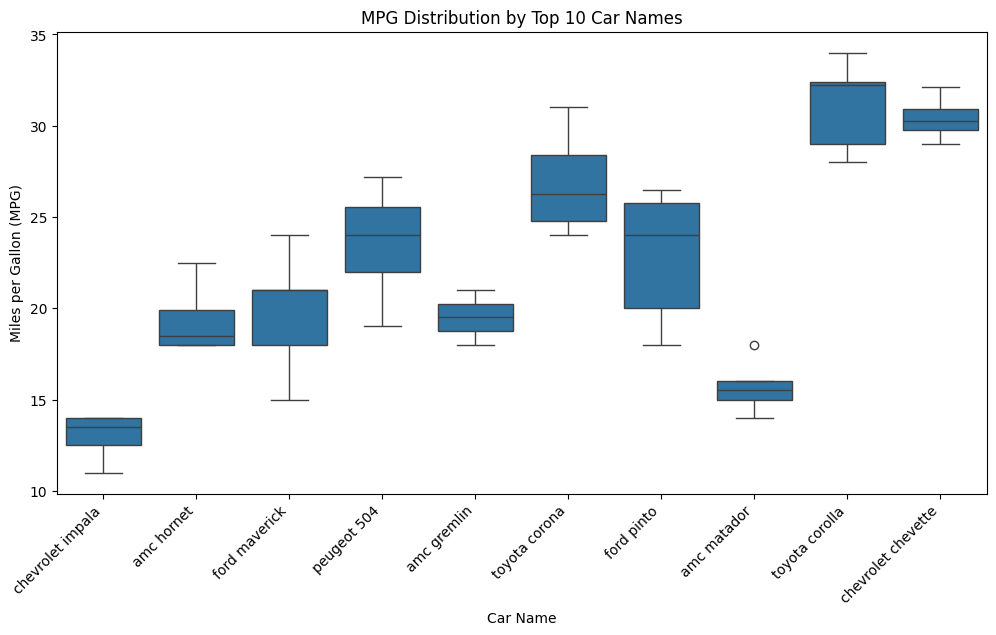

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find top 10 most frequent car names
top_cars = df['car_name'].value_counts().nlargest(10).index

# Filter dataframe for these cars only
df_top_cars = df[df['car_name'].isin(top_cars)]

# Plot boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='car_name', y='mpg', data=df_top_cars)
plt.xticks(rotation=45, ha='right')
plt.title('MPG Distribution by Top 10 Car Names')
plt.xlabel('Car Name')
plt.ylabel('Miles per Gallon (MPG)')
plt.show()

There are lot of unique car names have in car_name column.so we cant predict the MPG using care_name.so Instead of using full car_name i can extract useful features from it like brand

In [ ]:
df['brand'] = df['car_name'].str.split().str[0]

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,acceleration,model_year,car_name,weight_kg,Europe,Japan,USA,brand
0,18.0,8,307.0,130.0,12.0,1970,chevrolet chevelle malibu,1589.386368,0,0,1,chevrolet
1,15.0,8,350.0,165.0,11.5,1970,buick skylark 320,1675.115256,0,0,1,buick
2,18.0,8,318.0,150.0,11.0,1970,plymouth satellite,1558.542112,0,0,1,plymouth
3,16.0,8,304.0,150.0,12.0,1970,amc rebel sst,1557.181336,0,0,1,amc
4,17.0,8,302.0,140.0,10.5,1970,ford torino,1564.438808,0,0,1,ford


In [ ]:
df.drop('car_name', axis=1, inplace=True)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,acceleration,model_year,weight_kg,Europe,Japan,USA,brand
0,18.0,8,307.0,130.0,12.0,1970,1589.386368,0,0,1,chevrolet
1,15.0,8,350.0,165.0,11.5,1970,1675.115256,0,0,1,buick
2,18.0,8,318.0,150.0,11.0,1970,1558.542112,0,0,1,plymouth
3,16.0,8,304.0,150.0,12.0,1970,1557.181336,0,0,1,amc
4,17.0,8,302.0,140.0,10.5,1970,1564.438808,0,0,1,ford


In [ ]:
print(df['brand'].value_counts())

brand
ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
vw                6
volvo             6
chrysler          6
renault           5
saab              4
subaru            4
opel              4
chevy             3
cadillac          2
bmw               2
mercedes-benz     2
maxda             2
hi                1
toyouta           1
chevroelt         1
capri             1
mercedes          1
vokswagen         1
triumph           1
nissan            1
Name: count, dtype: int64


In [ ]:
brand_corrections = {
    'chevy': 'chevrolet',
    'chevroelt': 'chevrolet',
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'toyouta': 'toyota',
    'maxda': 'mazda',
    'mercedes': 'mercedes-benz'
}
df['brand'] = df['brand'].replace(brand_corrections)

In [ ]:
brand_counts = df['brand'].value_counts()
rare_brands = brand_counts[brand_counts < 4].index

df['brand'] = df['brand'].apply(lambda x: 'other' if x in rare_brands else x)

In [ ]:
print(df['brand'].value_counts())

brand
ford          51
chevrolet     47
plymouth      31
amc           28
dodge         28
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
other         11
oldsmobile    10
peugeot        8
fiat           8
audi           7
chrysler       6
volvo          6
renault        5
saab           4
opel           4
subaru         4
Name: count, dtype: int64


In [ ]:

# Get list of all brands
brands = df['brand'].unique()

# Create a list of mpg values grouped by brand
mpg_by_brand = [df[df['brand'] == brand]['mpg'] for brand in brands]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*mpg_by_brand)

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 10.48093462961487
P-value: 1.9198059261441234e-28


✅ F-statistic: 10.48
This is the test statistic used in ANOVA.
A higher F-value means there’s more variation between the group means (brands) than within the groups.

✅ P-value: 1.92e-28
That’s 0.0000000000000000000000000001919805 — basically zero.
Since this is much smaller than 0.05, we can strongly reject the null hypothesis.

🧠 Interpretation:
✅ There is a statistically significant relationship between car brand and MPG.
This means that at least one brand's average MPG is significantly different from the others.

In [ ]:
df = pd.get_dummies(df, columns=['brand'], drop_first=True).astype(int)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,acceleration,model_year,weight_kg,Europe,Japan,USA,...,brand_other,brand_peugeot,brand_plymouth,brand_pontiac,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,18,8,307,130,12,1970,1589,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,15,8,350,165,11,1970,1675,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,18,8,318,150,11,1970,1558,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,16,8,304,150,12,1970,1557,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,17,8,302,140,10,1970,1564,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df['brand_buick'])

0      0
1      1
2      0
3      0
4      0
      ..
393    0
394    0
395    0
396    0
397    0
Name: brand_buick, Length: 398, dtype: int64


In [ ]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['mpg'], df['cylinders'])

print("Correlation:", corr)
print("P-value:", p_value)

Correlation: -0.7780314857095968
P-value: 5.818558406072912e-82


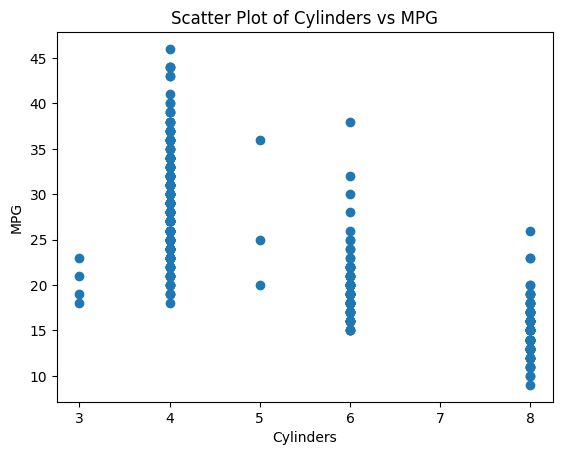

In [ ]:
plt.scatter(df['cylinders'], df['mpg'])
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('Scatter Plot of Cylinders vs MPG')
plt.show()

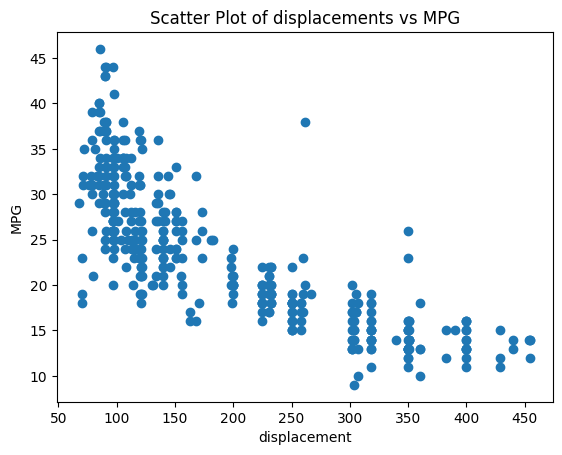

Correlation: -0.8059803343369094
P-value: 3.3002241901795864e-92


In [ ]:
plt.scatter(df['displacement'], df['mpg'])
plt.xlabel('displacement')
plt.ylabel('MPG')
plt.title('Scatter Plot of displacements vs MPG')
plt.show()

corr, p_value = pearsonr(df['mpg'], df['displacement'])

print("Correlation:", corr)
print("P-value:", p_value)

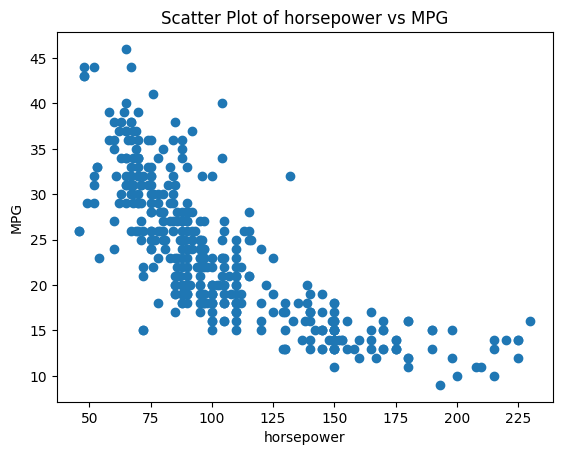

Correlation: -0.7729419714263346
P-value: 2.9549713080748917e-80


In [ ]:
plt.scatter(df['horsepower'], df['mpg'])
plt.xlabel('horsepower')
plt.ylabel('MPG')
plt.title('Scatter Plot of horsepower vs MPG')
plt.show()
corr, p_value = pearsonr(df['mpg'], df['horsepower'])

print("Correlation:", corr)
print("P-value:", p_value)

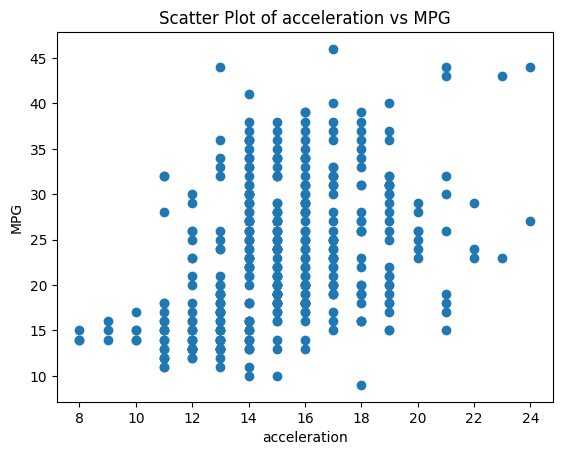

Correlation: 0.4007554880797437
P-value: 8.704778349363927e-17


In [ ]:
plt.scatter(df['acceleration'], df['mpg'])
plt.xlabel('acceleration')
plt.ylabel('MPG')
plt.title('Scatter Plot of acceleration vs MPG')
plt.show()

corr, p_value = pearsonr(df['mpg'], df['acceleration'])

print("Correlation:", corr)
print("P-value:", p_value)

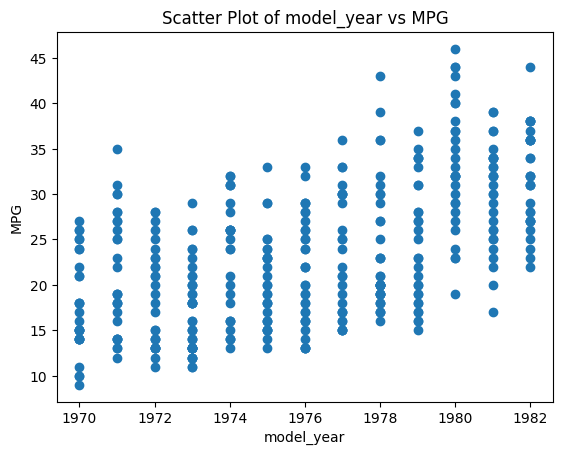

Correlation: 0.5677832845281563
P-value: 2.409427848654881e-35


In [ ]:
plt.scatter(df['model_year'], df['mpg'])
plt.xlabel('model_year')
plt.ylabel('MPG')
plt.title('Scatter Plot of model_year vs MPG')
plt.show()

corr, p_value = pearsonr(df['mpg'], df['model_year'])

print("Correlation:", corr)
print("P-value:", p_value)

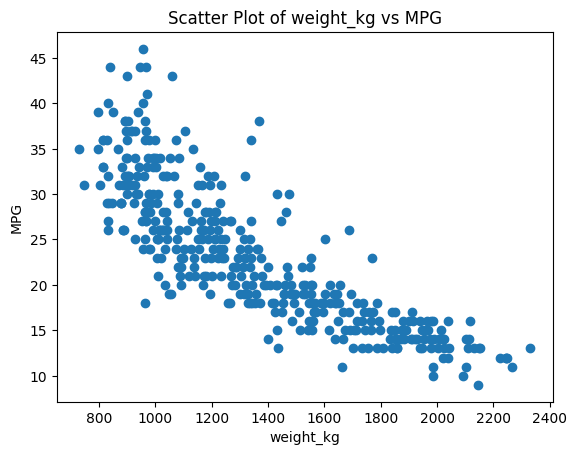

Correlation: -0.8346843782738328
P-value: 1.2362984012157334e-104


In [ ]:
plt.scatter(df['weight_kg'], df['mpg'])
plt.xlabel('weight_kg')
plt.ylabel('MPG')
plt.title('Scatter Plot of weight_kg vs MPG')
plt.show()

corr, p_value = pearsonr(df['mpg'], df['weight_kg'])

print("Correlation:", corr)
print("P-value:", p_value)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Set your features and target
X = df.drop(columns=['mpg'])   # all features
y = df['mpg']                  # target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
numerical_features = ['cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year', 'weight_kg']

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training numerical columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform test numerical columns
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.8182
MAE: 2.4476
MSE: 9.6645
RMSE: 3.1088


In [ ]:
print(df['cylinders'].value_counts())

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64


I predict cylinders is a categorical feature

In [ ]:
# Convert cylinders to string (optional, but helps pandas treat as categorical)
df['cylinders'] = df['cylinders'].astype(str)

# Create one-hot encoded variables
cylinders_dummies = pd.get_dummies(df['cylinders'], prefix='cyl').astype(int)

# Add these dummy columns back to the dataframe
df = pd.concat([df, cylinders_dummies], axis=1)

# Drop original 'cylinders' column if you want
df.drop('cylinders', axis=1, inplace=True)

In [ ]:
df.head()

,mpg,displacement,horsepower,acceleration,model_year,weight_kg,Europe,Japan,USA,brand_audi,...,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,18,307,130,12,1970,1589,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,15,350,165,11,1970,1675,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,18,318,150,11,1970,1558,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,16,304,150,12,1970,1557,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,17,302,140,10,1970,1564,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Set your features and target
X1 = df.drop(columns=['mpg'])   # all features
y1 = df['mpg']                  # target
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

In [ ]:
df.head()

,mpg,displacement,horsepower,acceleration,model_year,weight_kg,Europe,Japan,USA,brand_audi,...,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,18,307,130,12,1970,1589,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,15,350,165,11,1970,1675,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,18,318,150,11,1970,1558,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,16,304,150,12,1970,1557,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,17,302,140,10,1970,1564,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
numerical_features = ['displacement', 'horsepower', 'acceleration', 'model_year', 'weight_kg']

# Initialize scaler
scaler1 = StandardScaler()

# Fit scaler on training numerical columns
X1_train[numerical_features] = scaler1.fit_transform(X1_train[numerical_features])

# Transform test numerical columns
X1_test[numerical_features] = scaler1.transform(X1_test[numerical_features])

In [ ]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
# Predict on test data
y1_pred = model1.predict(X1_test)

# Evaluation metrics
mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1_test, y1_pred)

# Print results
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.8259
MAE: 2.3735
MSE: 9.2580
RMSE: 3.0427


i think the previous model is good but i want increase accuracy so i convert horsepower and displacement feature in to polynomial feature

In [ ]:
poly_features = ['horsepower', 'displacement']   # For polynomial features + scaling
numeric_features = ['weight_kg', 'acceleration', 'model_year']  # Scale these normally
onehot_features = [col for col in df.columns if col.startswith('brand_') or col in ['USA', 'Europe', 'Japan'] or col.startswith('cyl_')]  # Already one-hot encoded categorical

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# Pipeline for polynomial features + scaling
poly_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scale', StandardScaler())
])

# Pipeline for numeric features (scale only)
numeric_transformer = Pipeline([
    ('scale', StandardScaler())
])

# Categorical one-hot encoded columns: no transform needed, just pass through
pass_through = 'passthrough'

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('poly', poly_transformer, poly_features),
    ('num', numeric_transformer, numeric_features),
    ('cat', pass_through, onehot_features)
])

In [ ]:
model23 = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
X = df.drop('mpg', axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model23.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('poly',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['horsepower',
                                                   'displacement']),
                                                 ('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['weight_kg', 'acceleration',
                                                   'model_year']),
                                                 ('cat', 'passthrough',
                                                  ['Europe', 'Japan', 'USA',
                                                   'brand_audi',...
                                                   'brand_datsun',
                                                   'brand_dodge', 'brand_fiat',
                                                   'brand_ford', 'brand_honda',
                                                   'brand_mazda',
                                                   'brand_mercury',
                                                   'brand_oldsmobile',
                                                   'brand_opel', 'brand_other',
                                                   'brand_peugeot',
                                                   'brand_plymouth',
                                                   'brand_pontiac',
                                                   'brand_renault',
                                                   'brand_saab', 'brand_subaru',
                                                   'brand_toyota',
                                                   'brand_volkswagen',
                                                   'brand_volvo', 'cyl_3',
                                                   'cyl_4', 'cyl_5', 'cyl_6', ...])])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred = model23.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.852876593406241
MAE: 2.1265188519332865
RMSE: 2.7966482100454098


save the trained model

In [ ]:
import joblib

joblib.dump(model23, 'mpg_model.pkl')

['mpg_model.pkl']